PCA Algorithm with NumPy - Laksh Aithani

In [7]:
#Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def Scaler(ar):
    
    #Scales the data to have zero mean and unit variance
    
    
    k,n = ar.shape
    for i in range(n):
        nu = ar[:,i].mean()
        stdev = ar[:,i].std(ddof = 1)
        
        ar[:,i] = (1/stdev)*(ar[:,i] - nu)

In [3]:
def PCA(ar):
    
    #Computes the eigenvectors and eigenvalues of the matrix 
    
    arTar = np.dot(ar.T,ar)
    evals, evecs = np.linalg.eig(arTar)
    idx = evals.argsort()
    idx = idx[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
    
    return evals, evecs

In [13]:
def projectpoints(ar):
    
    #Projects the data onto the principal axes
    
    
    k,n = ar.shape
    evals, evecs = PCA(ar)
    PCs = np.zeros((k, n))
    for i in range(n):
        for j in range(k):
            PCs[j,i] = np.dot(ar[j,:],evecs[:,i])
    
    return PCs

In [21]:
def Two_D_plotter(projected_data,target_data):
    
    #Plots the projected data onto each of the components
    
    plt.figure(figsize = (8,6))
    plt.scatter(projected_data[:,0],projected_data[:,1],c=target_data)
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Plot of data projected onto the 2 most important principal components')

In [19]:
def explained_variance_plotter(n_components = 5):
    
    #Plot of the explained variance
    
    explained_variance = [i/evals.sum() for i in evals]
    plt.figure(figsize = (8,6))
    plt.bar([i for i in range(1,n_components+1)],explained_variance[:n_components])
    plt.ylabel('Explained proportion of variance')
    plt.xlabel('Principal component')
    plt.title('Explained variance')

In [16]:
#Loading dataset

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

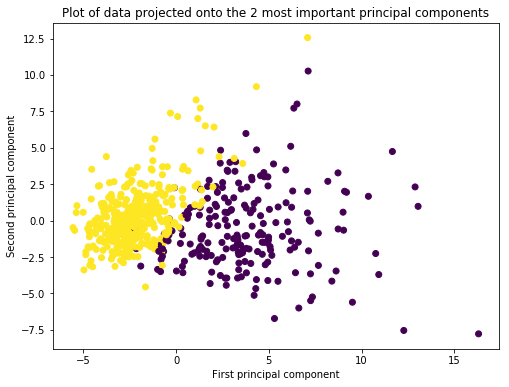

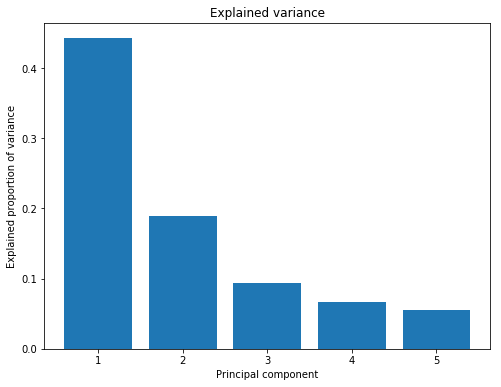

In [22]:
data = cancer['data']
Scaler(data)
evals, evecs = PCA(data)
PCs = projectpoints(data)
Two_D_plotter(PCs,cancer['target'])
explained_variance_plotter()